<a href="https://colab.research.google.com/github/Sanjana-g10/Statistical-Analysis-On-Crop-Production/blob/main/Sem_6_college_project_Crop_Production_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Read the Data Frame
df = pd.read_csv('/content/drive/MyDrive/Crop_production.csv.zip')
df.head()

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [ ]:
# Dropping the Duplicate Values
df = df.drop_duplicates()
df.head()

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [ ]:
# Handling Null Values
df.isnull().sum()

State_Name            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64

In [ ]:
# Getting to know our Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99849 non-null  object 
 1   Crop_Type           99849 non-null  object 
 2   Crop                99849 non-null  object 
 3   N                   99849 non-null  int64  
 4   P                   99849 non-null  int64  
 5   K                   99849 non-null  int64  
 6   pH                  99849 non-null  float64
 7   rainfall            99849 non-null  float64
 8   temperature         99849 non-null  float64
 9   Area_in_hectares    99849 non-null  float64
 10  Production_in_tons  99849 non-null  float64
 11  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 9.1+ MB


In [ ]:
# Describing the Data Set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,99849.0,69.816823,39.571469,10.000000,50.000000,75.000000,80.000000,1.800000e+02
P,99849.0,41.593656,15.056508,10.000000,40.000000,40.000000,60.000000,1.250000e+02
K,99849.0,42.037827,28.430263,10.000000,20.000000,30.000000,50.000000,2.000000e+02
pH,99849.0,5.643624,0.505283,3.820000,5.360000,5.540000,5.960000,7.000000e+00
rainfall,99849.0,701.151085,604.701552,3.274569,157.310000,579.750000,1110.780000,3.322060e+03
temperature,99849.0,26.684154,4.851214,1.180000,23.106000,27.333333,29.266667,3.534667e+01
Area_in_hectares,99849.0,16476.585668,43604.268231,0.580000,130.000000,1010.000000,8099.000000,7.263000e+05
Production_in_tons,99849.0,37762.912080,122244.670727,0.000000,162.000000,1506.000000,14395.000000,3.530571e+06
Yield_ton_per_hec,99849.0,3.931149,33.872242,0.000000,0.586207,1.329268,2.997288,9.801000e+03


In [ ]:
# Finding all the Unique value in the Data Set
df.nunique()

State_Name               33
Crop_Type                 4
Crop                     53
N                        15
P                        13
K                        16
pH                      101
rainfall                111
temperature             109
Area_in_hectares      26346
Production_in_tons    33217
Yield_ton_per_hec     72860
dtype: int64

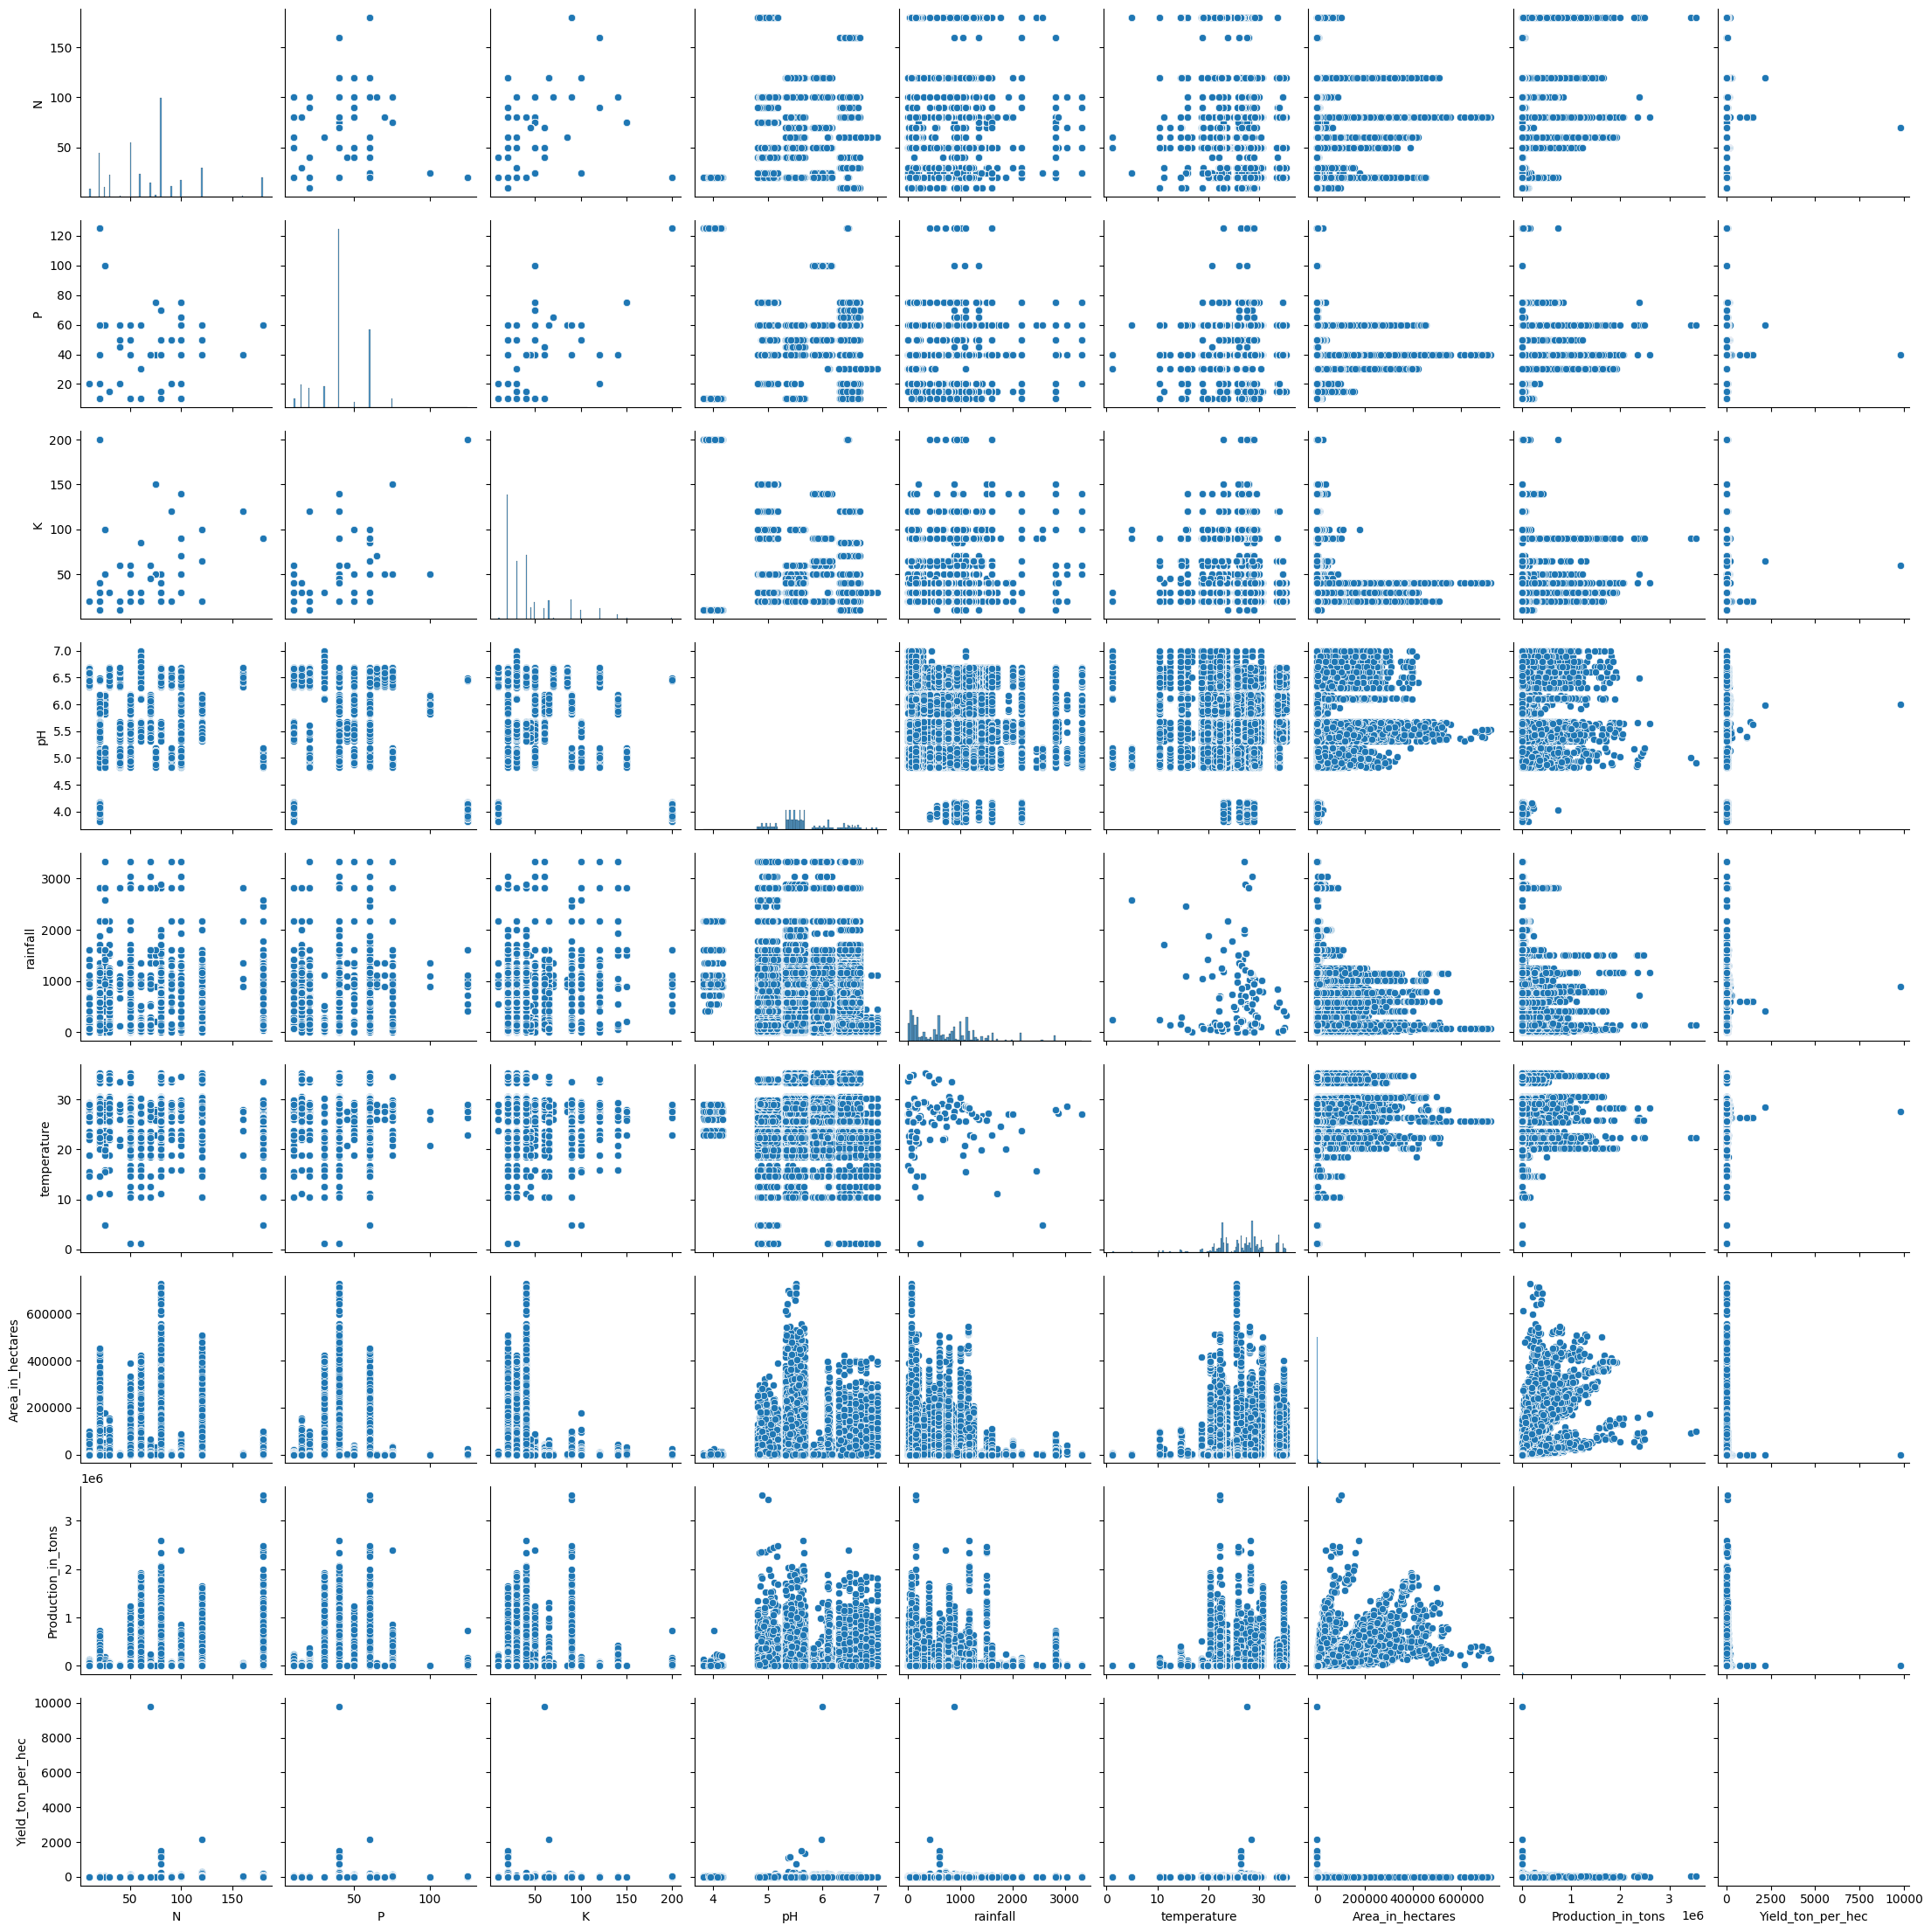

In [ ]:
# prompt: pair plot for production in tons and yield ton per hec

import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()


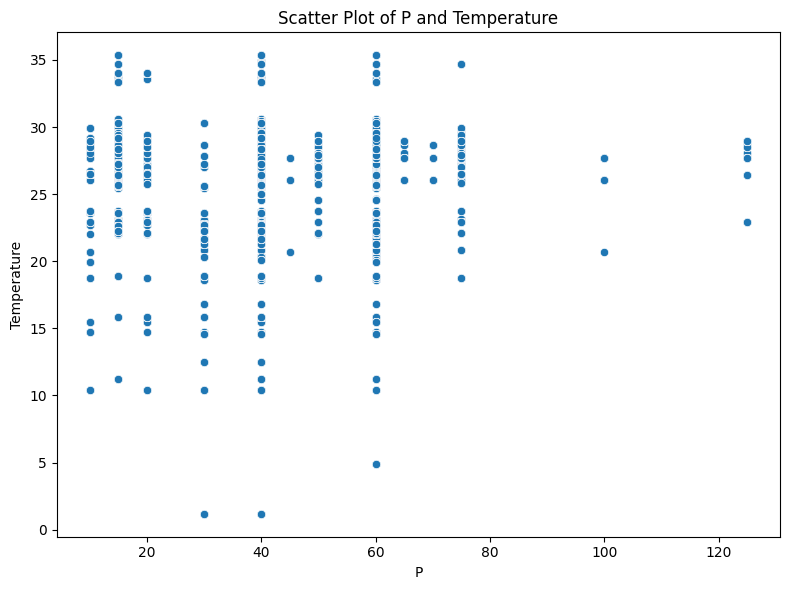

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='P', y='temperature')
plt.title('Scatter Plot of P and Temperature')
plt.xlabel('P')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()


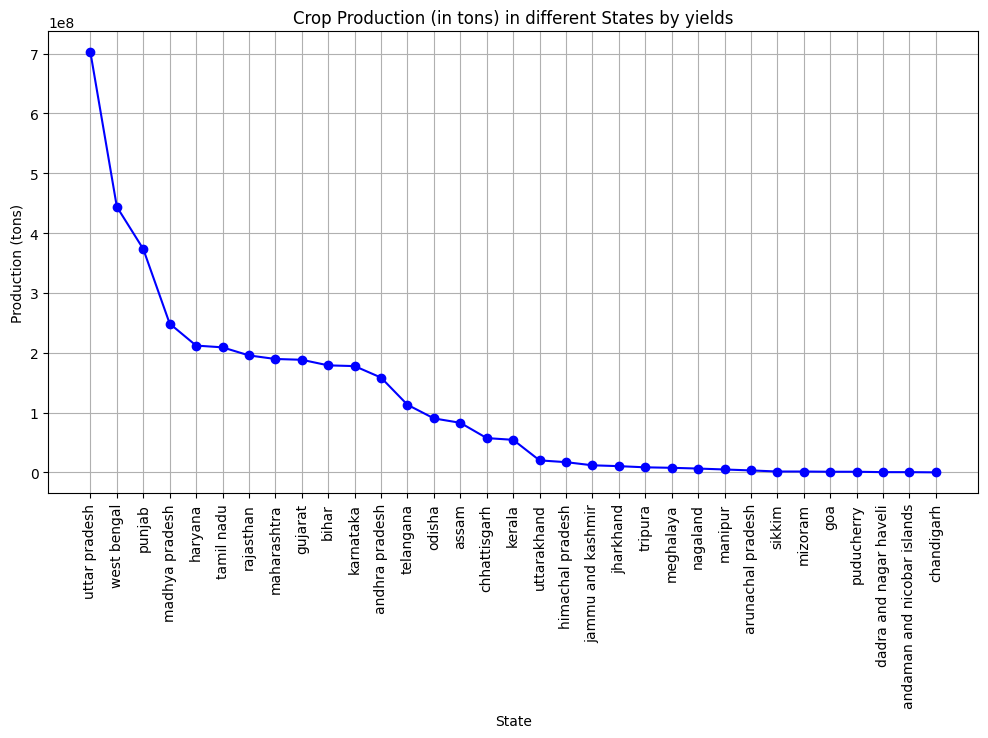

In [ ]:
 #prompt: line plot for states and production in tons

# Group data by state and calculate total production
state_production = df.groupby('State_Name')['Production_in_tons'].sum()

# Sort by production
state_production = state_production.sort_values(ascending=False)

# Extract state names and production values
state_names = state_production.index.to_list()
production_values = state_production.values.tolist()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(state_names, production_values, marker='o', linestyle='-', color='b')

# Add title, labels, and grid
plt.title('Crop Production (in tons) in different States by yields')
plt.xlabel('State')
plt.ylabel('Production (tons)')
plt.xticks(rotation=90)
plt.grid(True)

# Display the plot
plt.show()


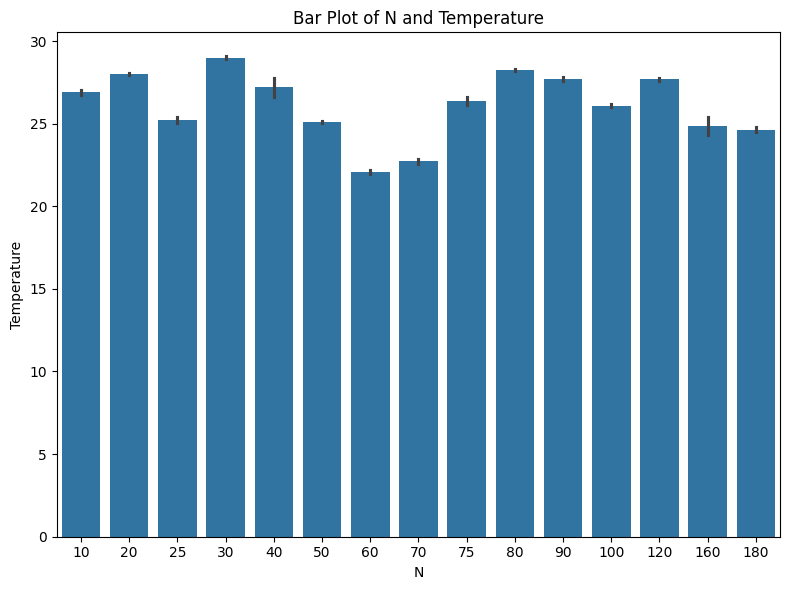

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='N', y='temperature')
plt.title('Bar Plot of N and Temperature')
plt.xlabel('N')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

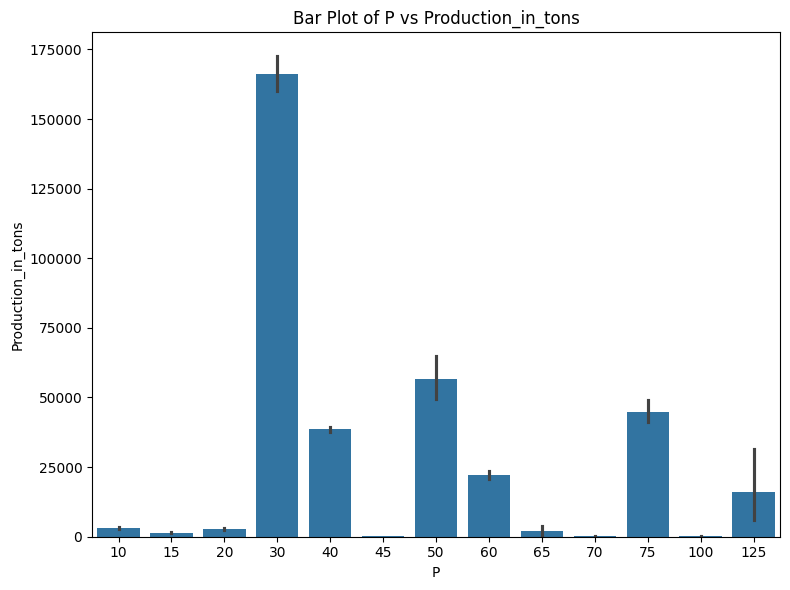

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='P', y='Production_in_tons')
plt.title('Bar Plot of P vs Production_in_tons')
plt.xlabel('P')
plt.ylabel('Production_in_tons')
plt.tight_layout()
plt.show()

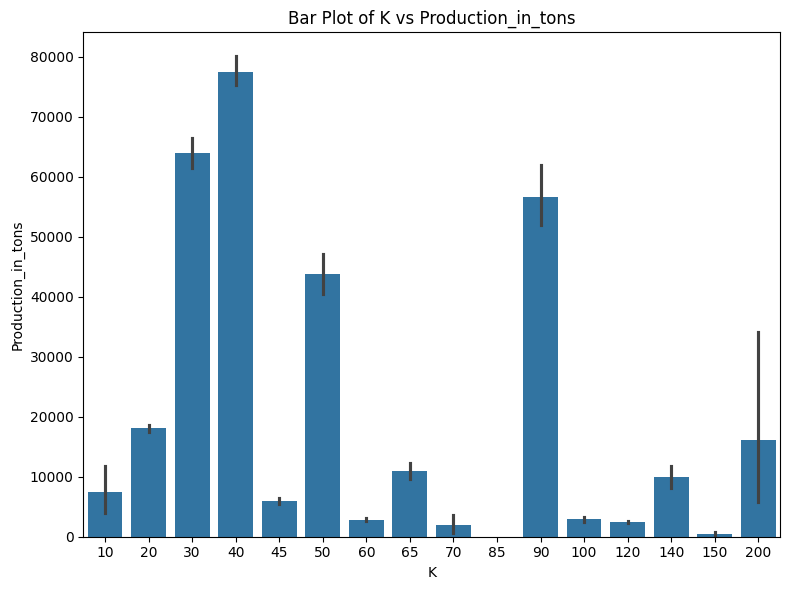

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='K', y='Production_in_tons')
plt.title('Bar Plot of K vs Production_in_tons')
plt.xlabel('K')
plt.ylabel('Production_in_tons')
plt.tight_layout()
plt.show()

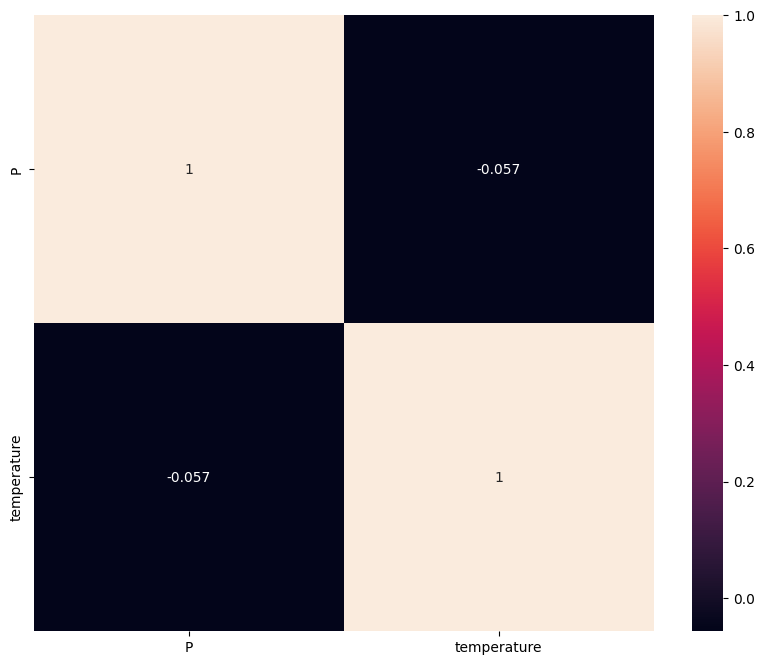

In [ ]:
# prompt: correlation heat map for P and temeprature

import matplotlib.pyplot as plt
plt.figure(figsize = [10, 8])
sns.heatmap(df[['P', 'temperature']].corr(), annot = True)
plt.show()


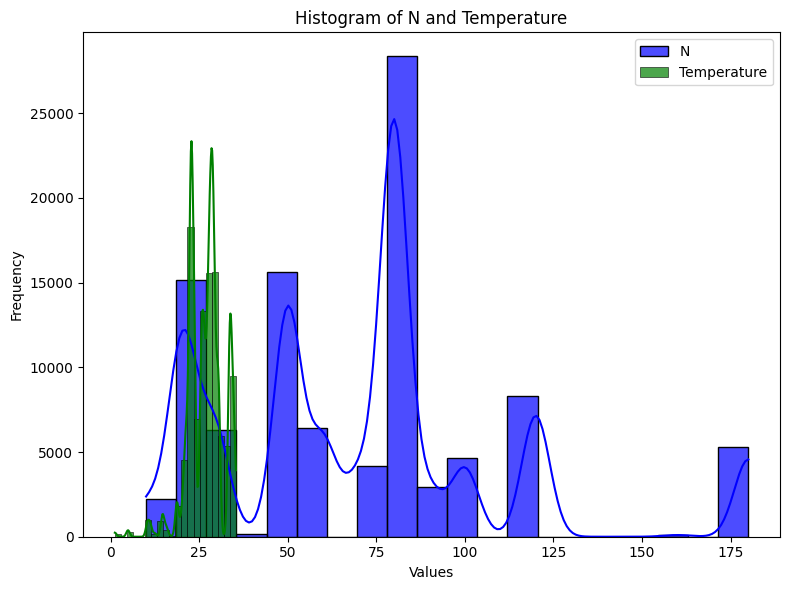

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='N', color='blue', alpha=0.7, bins=20, kde=True, label='N')
sns.histplot(data=df, x='temperature', color='green', alpha=0.7, bins=20, kde=True, label='Temperature')
plt.title('Histogram of N and Temperature')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


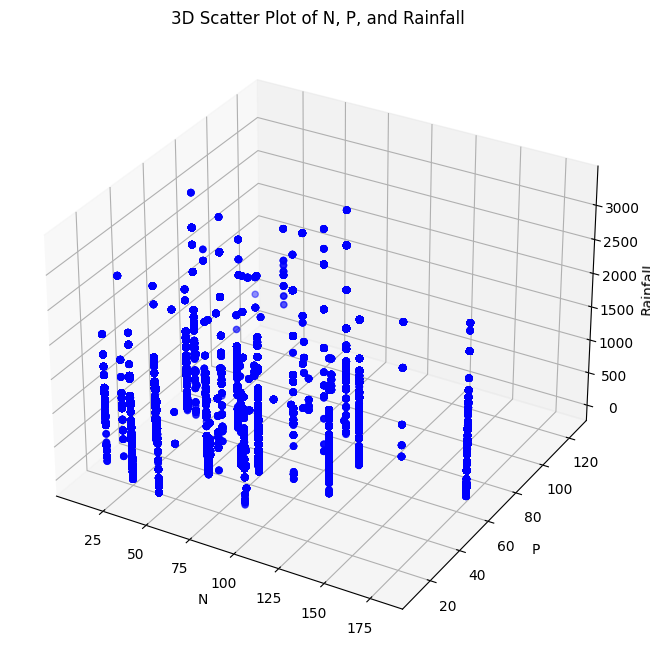

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['N'], df['P'], df['rainfall'], c='blue', marker='o')
ax.set_xlabel('N')
ax.set_ylabel('P')
ax.set_zlabel('Rainfall')
plt.title('3D Scatter Plot of N, P, and Rainfall')
plt.show()

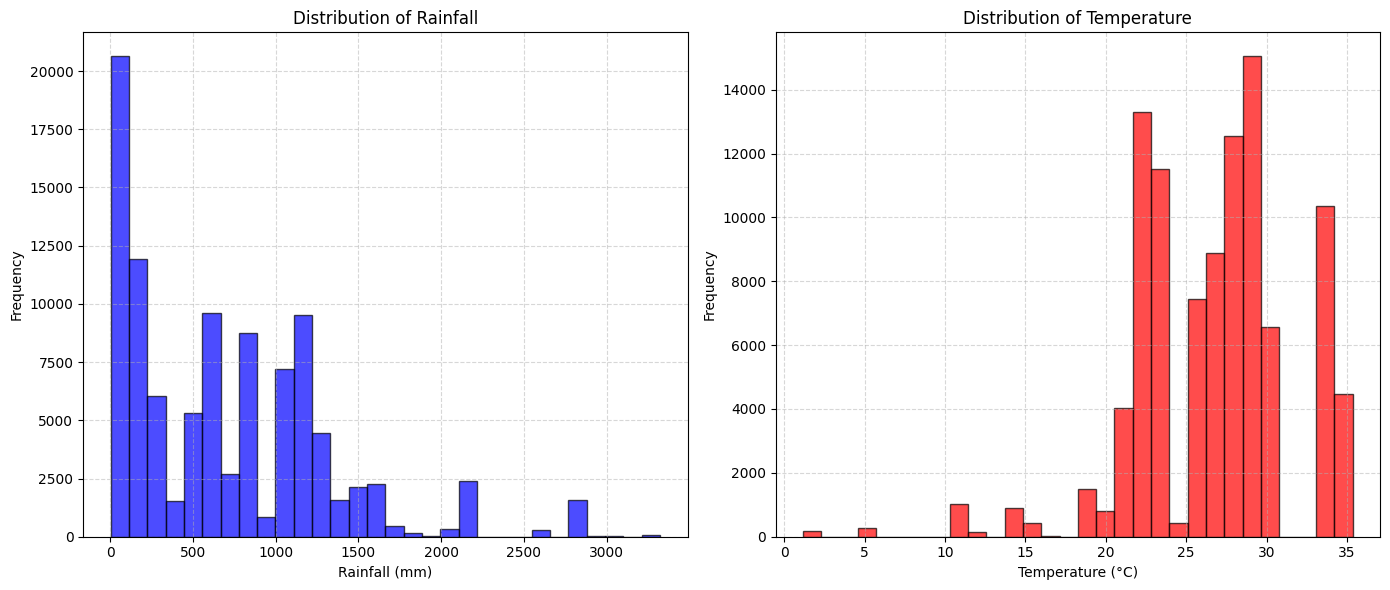

In [ ]:
# Create a figure with two subplots (one for each histogram)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram for Rainfall
ax1.hist(df['rainfall'], bins=30, color='blue', alpha=0.7, edgecolor='black')
ax1.set_title('Distribution of Rainfall')
ax1.set_xlabel('Rainfall (mm)')
ax1.set_ylabel('Frequency')
ax1.grid(True, linestyle='--', alpha=0.5)

# Histogram for Temperature
ax2.hist(df['temperature'], bins=30, color='red', alpha=0.7, edgecolor='black')
ax2.set_title('Distribution of Temperature')
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel('Frequency')
ax2.grid(True, linestyle='--', alpha=0.5)

# Improve layout and display the plot
plt.tight_layout()
plt.show()


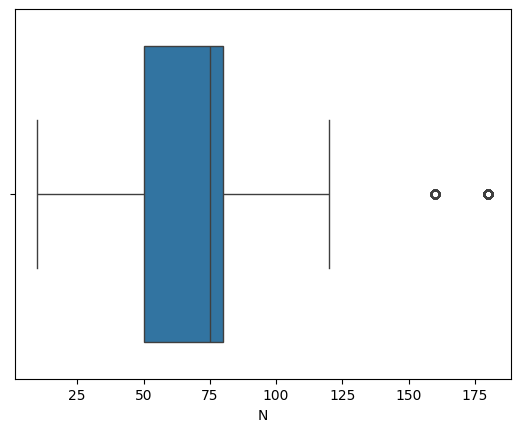

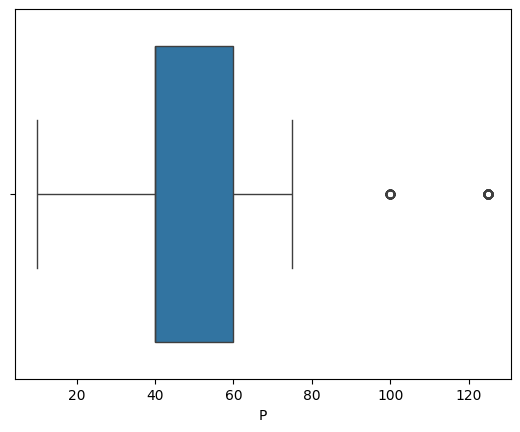

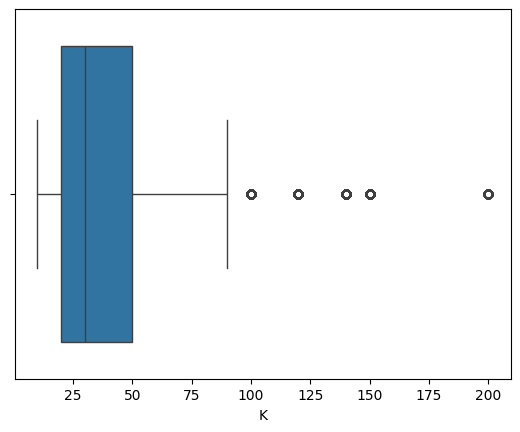

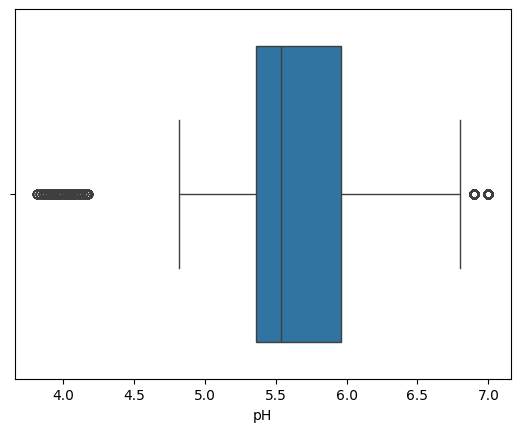

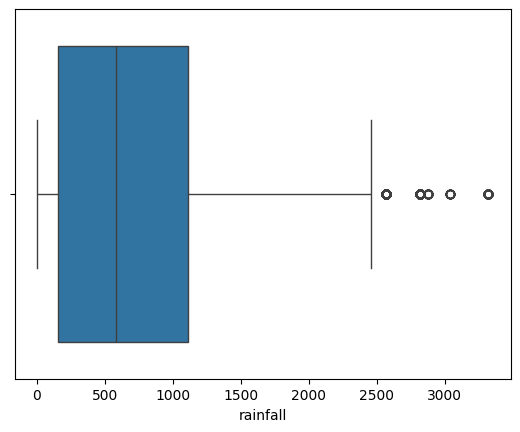

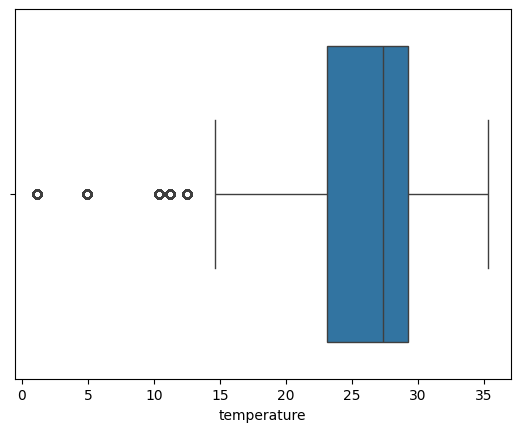

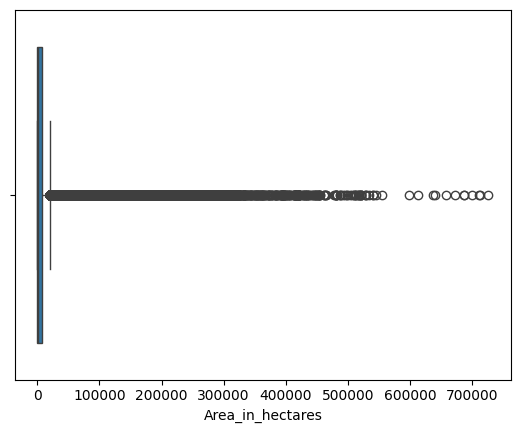

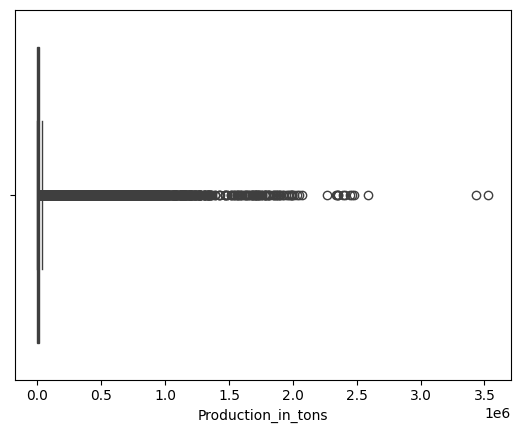

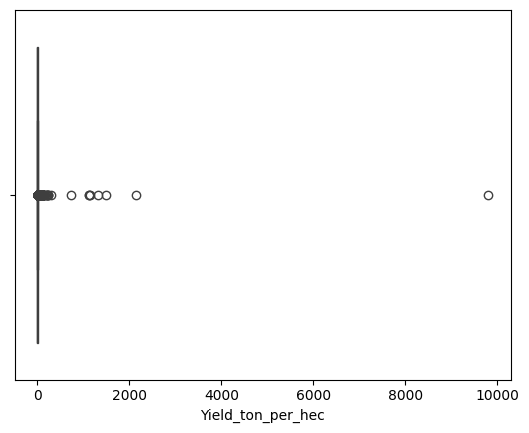

In [ ]:
l = ['N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Area_in_hectares', 'Production_in_tons', 'Yield_ton_per_hec']
for i in l:
  sns.boxplot(x = df[i])
  plt.show()

In [ ]:
# prompt: remove ouliers from the all the columns

import pandas as pd

# Define the column names
column_names = ['N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Area_in_hectares', 'Production_in_tons', 'Yield_ton_per_hec']


# Loop through each column and remove outliers using IQR method
for col in column_names:
  # Calculate Q1, Q3 and IQR
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Select rows within the bounds
  df = df[ (df[col] >= lower_bound) & (df[col] <= upper_bound) ]

# Print the updated DataFrame
print(df)


       Unnamed: 0      State_Name Crop_Type      Crop    N   P   K    pH  \
0               0  andhra pradesh    kharif    cotton  120  40  20  5.46   
2               2  andhra pradesh    kharif     jowar   80  40  40  5.42   
3               3  andhra pradesh    kharif     maize   80  40  20  5.62   
4               4  andhra pradesh    kharif     moong   20  40  20  5.68   
5               5  andhra pradesh    kharif      ragi   50  40  20  5.64   
...           ...             ...       ...       ...  ...  ..  ..   ...   
99839       99839     west bengal    kharif     moong   20  40  20  5.50   
99841       99841     west bengal      rabi     moong   20  40  20  5.62   
99843       99843     west bengal      rabi  rapeseed   50  40  20  5.12   
99845       99845     west bengal    summer     maize   80  40  20  5.68   
99846       99846     west bengal    summer      rice   80  40  40  5.64   

       rainfall  temperature  Area_in_hectares  Production_in_tons  \
0        654.34  

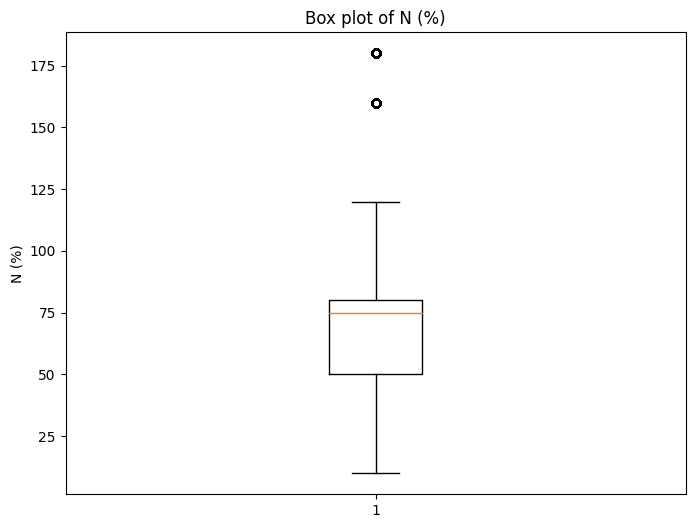

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['N'])
plt.title('Box plot of N (%)')
plt.ylabel('N (%)')
plt.show()

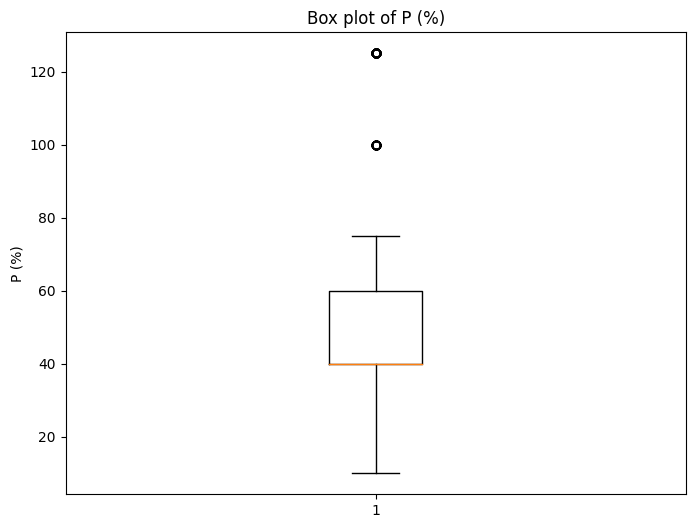

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['P'])
plt.title('Box plot of P (%)')
plt.ylabel('P (%)')
plt.show()

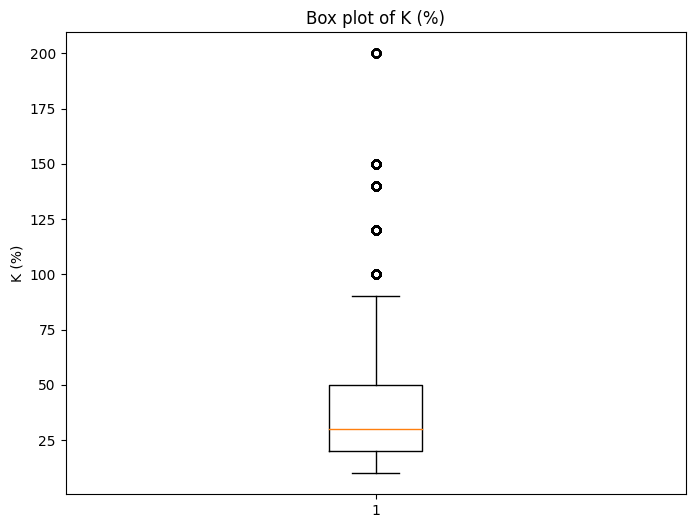

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['K'])
plt.title('Box plot of K (%)')
plt.ylabel('K (%)')
plt.show()

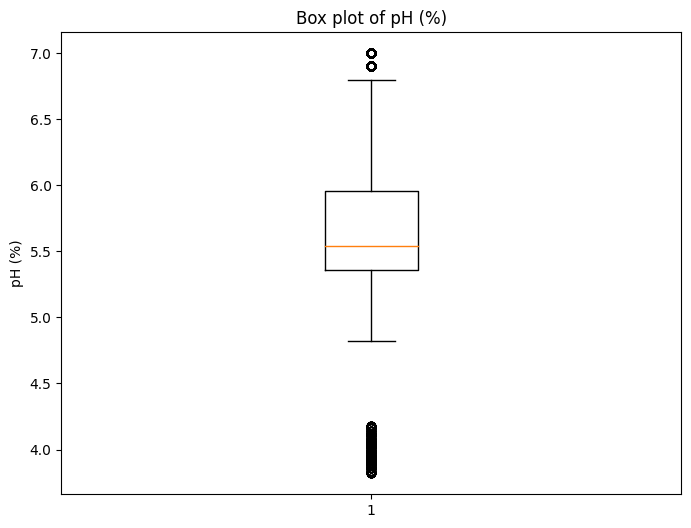

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['pH'])
plt.title('Box plot of pH (%)')
plt.ylabel('pH (%)')
plt.show()

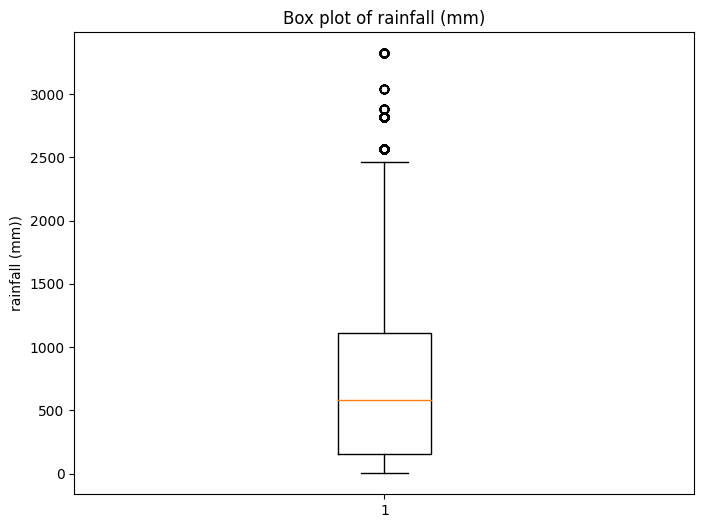

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['rainfall'])
plt.title('Box plot of rainfall (mm)')
plt.ylabel('rainfall (mm))')
plt.show()

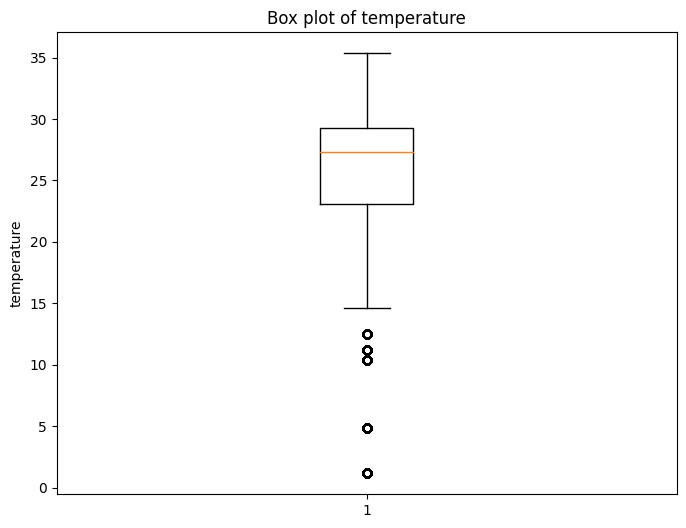

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['temperature'])
plt.title('Box plot of temperature')
plt.ylabel('temperature')
plt.show()

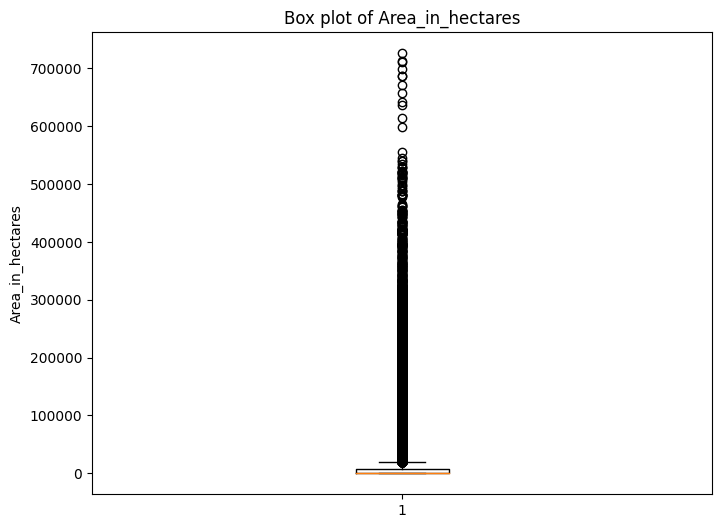

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Area_in_hectares'])
plt.title('Box plot of Area_in_hectares')
plt.ylabel('Area_in_hectares')
plt.show()

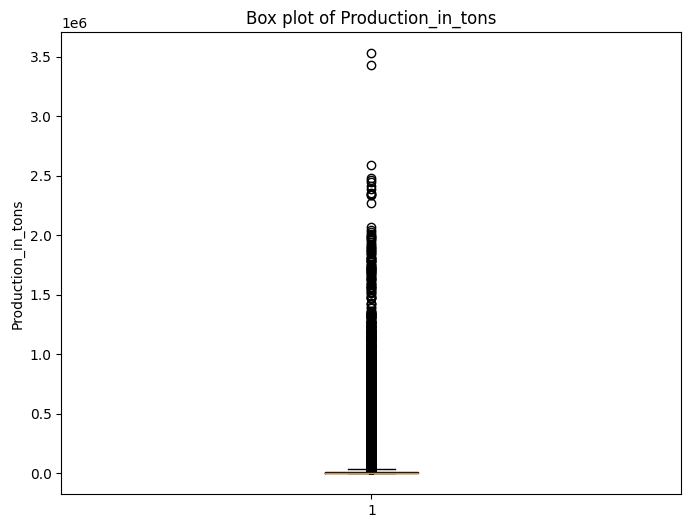

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Production_in_tons'])
plt.title('Box plot of Production_in_tons')
plt.ylabel('Production_in_tons')
plt.show()

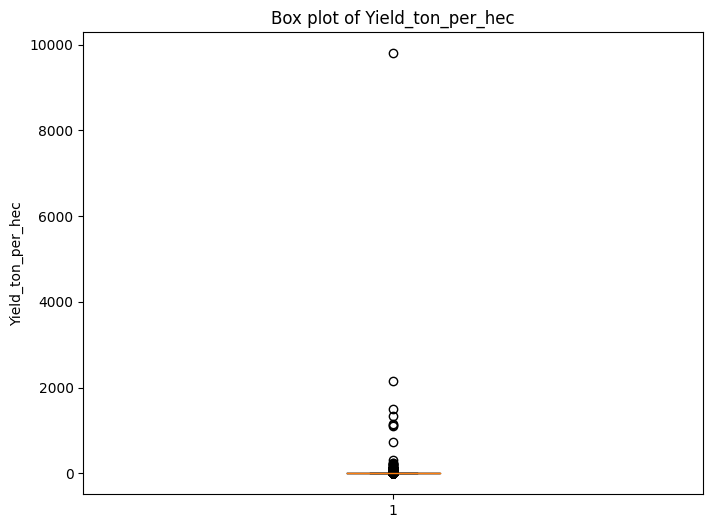

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Yield_ton_per_hec'])
plt.title('Box plot of Yield_ton_per_hec')
plt.ylabel('Yield_ton_per_hec')
plt.show()

In [ ]:
# prompt: remove ouliers from the data set

import pandas as pd

# Define the column(s) with outliers
column_with_outliers = 'Production_in_tons'

# Calculate the z-score for each data point in the chosen column
z_scores = (df[column_with_outliers] - df[column_with_outliers].mean()) / df[column_with_outliers].std()

# Define the threshold for outlier identification
threshold = 3

# Select rows where the z-score is within the threshold
df_filtered = df[abs(z_scores) <= threshold]

# Print the shape of the original and filtered data sets
print(f'Original data set shape: {df.shape}')
print(f'Filtered data set shape: {df_filtered.shape}')
plt.show()



Original data set shape: (99849, 12)
Filtered data set shape: (97842, 12)


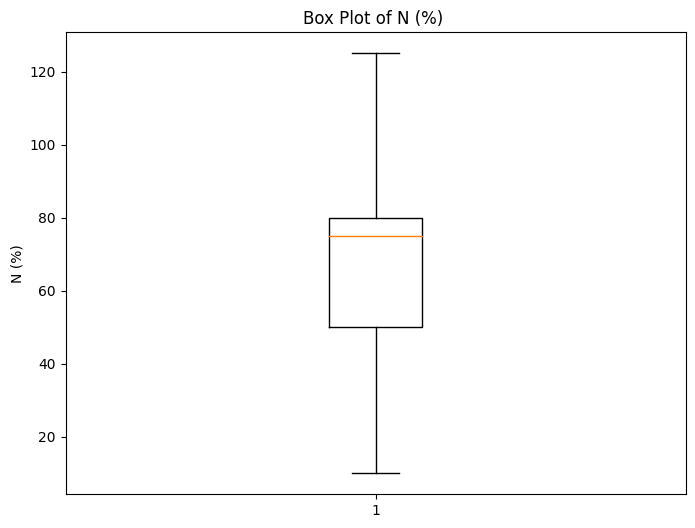

In [ ]:
q1=df['N'].quantile(0.25)
q3=df['N'].quantile(0.75)
iqr=q3-q1
q1 , q3, iqr
upper_limit= q3 +(1.5 *iqr)
lower_limit= q1 -(1.5 *iqr)
lower_limit ,upper_limit
df.loc[df['N']>=upper_limit ,'N']=upper_limit
df.loc[df['N']<=lower_limit ,'N']=lower_limit
plt.figure(figsize=(8, 6))
plt.boxplot(df['N'])
plt.title('Box Plot of N (%) ')
plt.ylabel('N (%)')
plt.show()

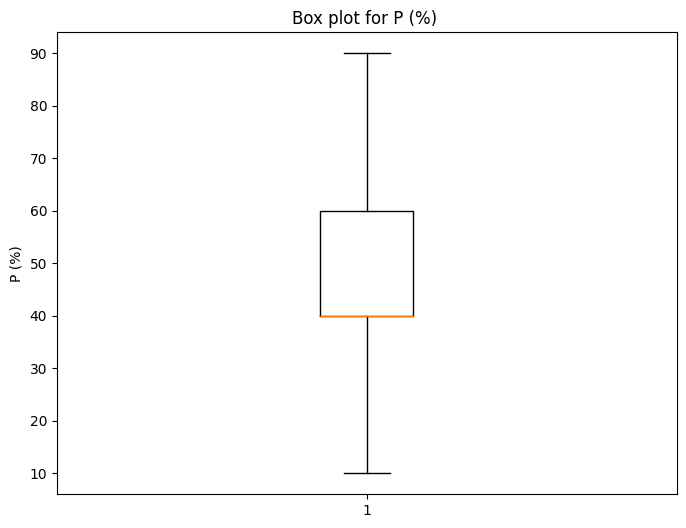

In [ ]:
q1=df['P'].quantile(0.25)
q3=df['P'].quantile(0.75)
iqr=q3-q1
q1 , q3, iqr
upper_limit= q3 +(1.5 *iqr)
lower_limit= q1 -(1.5 *iqr)
lower_limit ,upper_limit
df.loc[df['P']>=upper_limit ,'P']=upper_limit
df.loc[df['P']<=lower_limit ,'P']=lower_limit
plt.figure(figsize=(8, 6))
plt.boxplot(df['P'])
plt.title('Box plot for P (%) ')
plt.ylabel('P (%)')
plt.show()

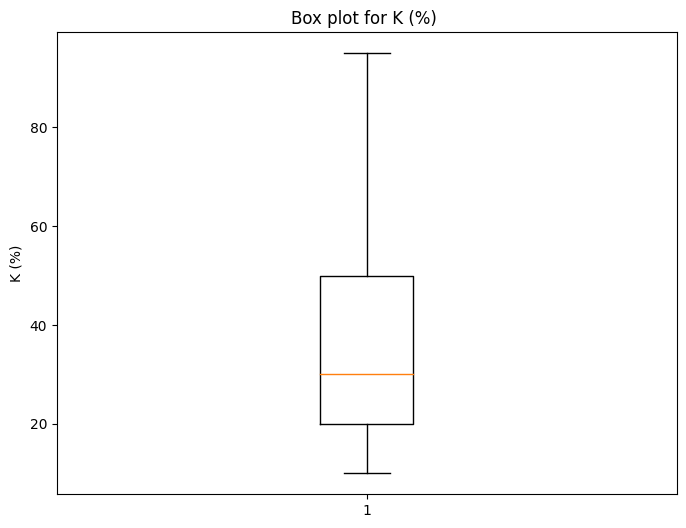

In [ ]:
q1=df['K'].quantile(0.25)
q3=df['K'].quantile(0.75)
iqr=q3-q1
q1 , q3, iqr
upper_limit= q3 +(1.5 *iqr)
lower_limit= q1 -(1.5 *iqr)
lower_limit ,upper_limit
df.loc[df['K']>=upper_limit ,'K']=upper_limit
df.loc[df['K']<=lower_limit ,'K']=lower_limit
plt.figure(figsize=(8, 6))
plt.boxplot(df['K'])
plt.title('Box plot for K (%) ')
plt.ylabel('K (%)')
plt.show()

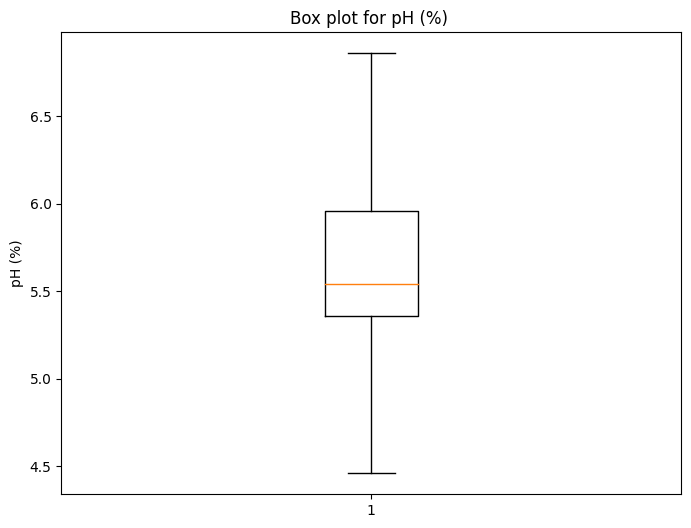

In [ ]:
q1=df['pH'].quantile(0.25)
q3=df['pH'].quantile(0.75)
iqr=q3-q1
q1 , q3, iqr
upper_limit= q3 +(1.5 *iqr)
lower_limit= q1 -(1.5 *iqr)
lower_limit ,upper_limit
df.loc[df['pH']>=upper_limit ,'pH']=upper_limit
df.loc[df['pH']<=lower_limit ,'pH']=lower_limit
plt.figure(figsize=(8, 6))
plt.boxplot(df['pH'])
plt.title('Box plot for pH (%) ')
plt.ylabel('pH (%)')
plt.show()

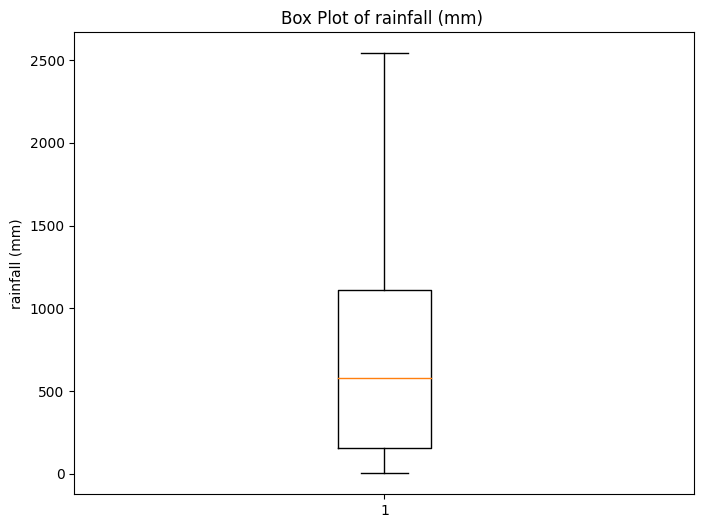

In [ ]:
q1=df['rainfall'].quantile(0.25)
q3=df['rainfall'].quantile(0.75)
iqr=q3-q1
q1 , q3, iqr
upper_limit= q3 +(1.5 *iqr)
lower_limit= q1 -(1.5 *iqr)
lower_limit ,upper_limit
df.loc[df['rainfall']>=upper_limit ,'rainfall']=upper_limit
df.loc[df['rainfall']<=lower_limit ,'rainfall']=lower_limit
plt.figure(figsize=(8, 6))
plt.boxplot(df['rainfall'])
plt.title('Box Plot of rainfall (mm) ')
plt.ylabel('rainfall (mm)')
plt.show()

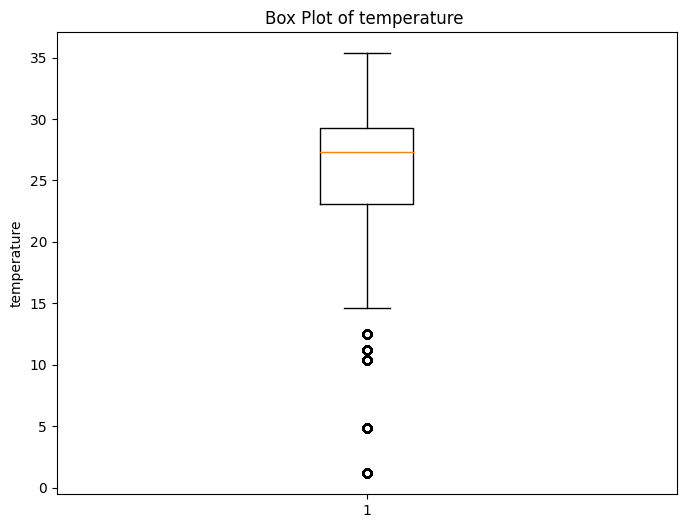

In [ ]:
q1=df['temperature'].quantile(0.25)
q3=df['temperature'].quantile(0.75)
iqr=q3-q1
q1 , q3, iqr
upper_limit= q3 +(1.5 *iqr)
lower_limit= q1 -(1.5 *iqr)
lower_limit ,upper_limit
df.loc[df['temperature']>=upper_limit ,'eur']=upper_limit
df.loc[df['temperature']<=lower_limit ,'eur']=lower_limit
plt.figure(figsize=(8, 6))
plt.boxplot(df['temperature'])
plt.title('Box Plot of temperature ')
plt.ylabel('temperature')
plt.show()

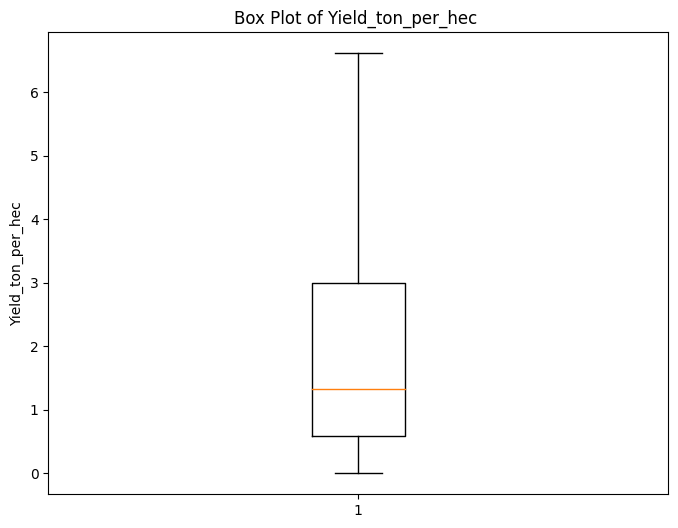

In [ ]:
q1=df['Yield_ton_per_hec'].quantile(0.25)
q3=df['Yield_ton_per_hec'].quantile(0.75)
iqr=q3-q1
q1 , q3, iqr
upper_limit= q3 +(1.5 *iqr)
lower_limit= q1 -(1.5 *iqr)
lower_limit ,upper_limit
df.loc[df['Yield_ton_per_hec']>=upper_limit ,'Yield_ton_per_hec']=upper_limit
df.loc[df['Yield_ton_per_hec']<=lower_limit ,'Yield_ton_per_hec']=lower_limit
plt.figure(figsize=(8, 6))
plt.boxplot(df['Yield_ton_per_hec'])
plt.title('Box Plot of Yield_ton_per_hec ')
plt.ylabel('Yield_ton_per_hec')
plt.show()

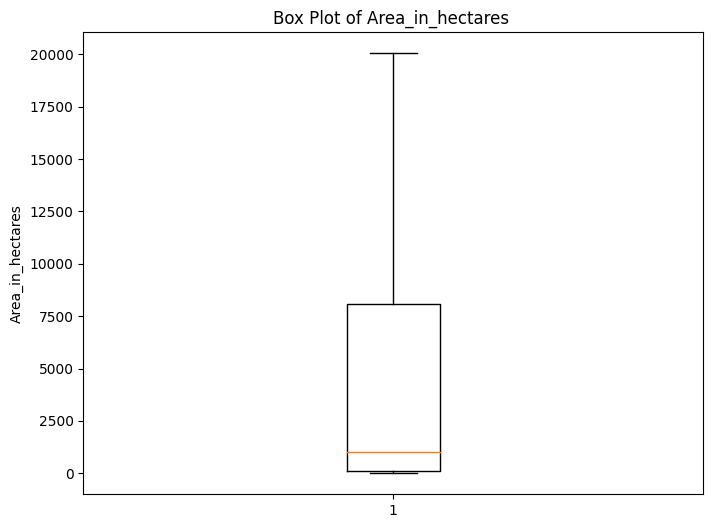

In [ ]:
q1=df['Area_in_hectares'].quantile(0.25)
q3=df['Area_in_hectares'].quantile(0.75)
iqr=q3-q1
q1 , q3, iqr
upper_limit= q3 +(1.5 *iqr)
lower_limit= q1 -(1.5 *iqr)
lower_limit ,upper_limit
df.loc[df['Area_in_hectares']>=upper_limit ,'Area_in_hectares']=upper_limit
df.loc[df['Area_in_hectares']<=lower_limit ,'Area_in_hectares']=lower_limit
plt.figure(figsize=(8, 6))
plt.boxplot(df['Area_in_hectares'])
plt.title('Box Plot of Area_in_hectares ')
plt.ylabel('Area_in_hectares')
plt.show()

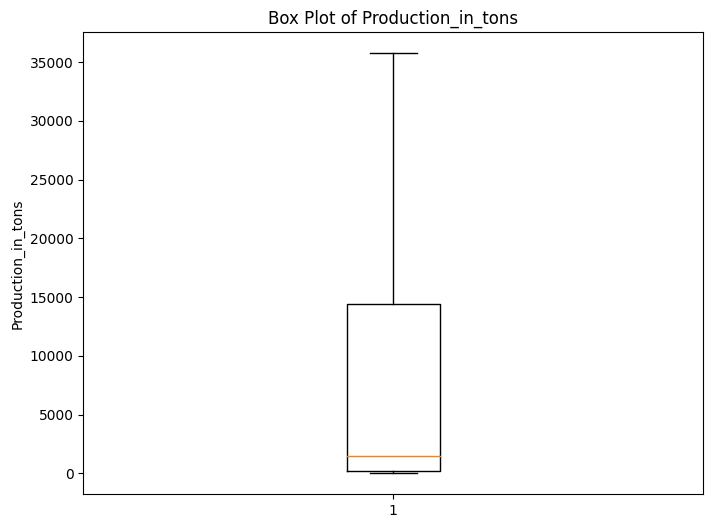

In [ ]:
q1=df['Production_in_tons'].quantile(0.25)
q3=df['Production_in_tons'].quantile(0.75)
iqr=q3-q1
q1 , q3, iqr
upper_limit= q3 +(1.5 *iqr)
lower_limit= q1 -(1.5 *iqr)
lower_limit ,upper_limit
df.loc[df['Production_in_tons']>=upper_limit ,'Production_in_tons']=upper_limit
df.loc[df['Production_in_tons']<=lower_limit ,'Production_in_tons']=lower_limit
plt.figure(figsize=(8, 6))
plt.boxplot(df['Production_in_tons'])
plt.title('Box Plot of Production_in_tons')
plt.ylabel('Production_in_tons')
plt.show()

<Axes: >

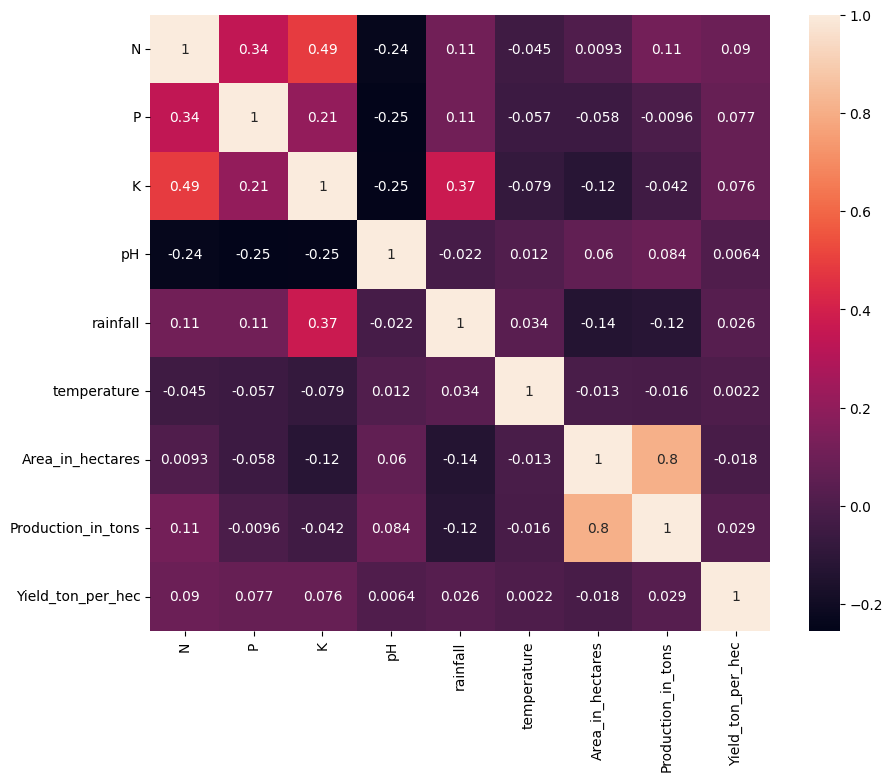

In [ ]:
plt.figure(figsize = [10, 8])
# Ploting Correlation Plot
sns.heatmap(df.corr(numeric_only=True), annot = True)

<Axes: ylabel='count'>

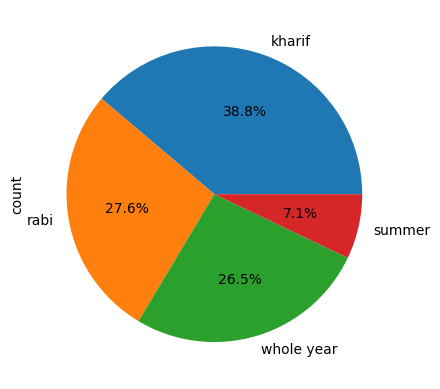

In [ ]:
df['Crop_Type'].value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
# prompt: add column year 2022-2023 to the dataset

df['Year'] = '2022-2023'

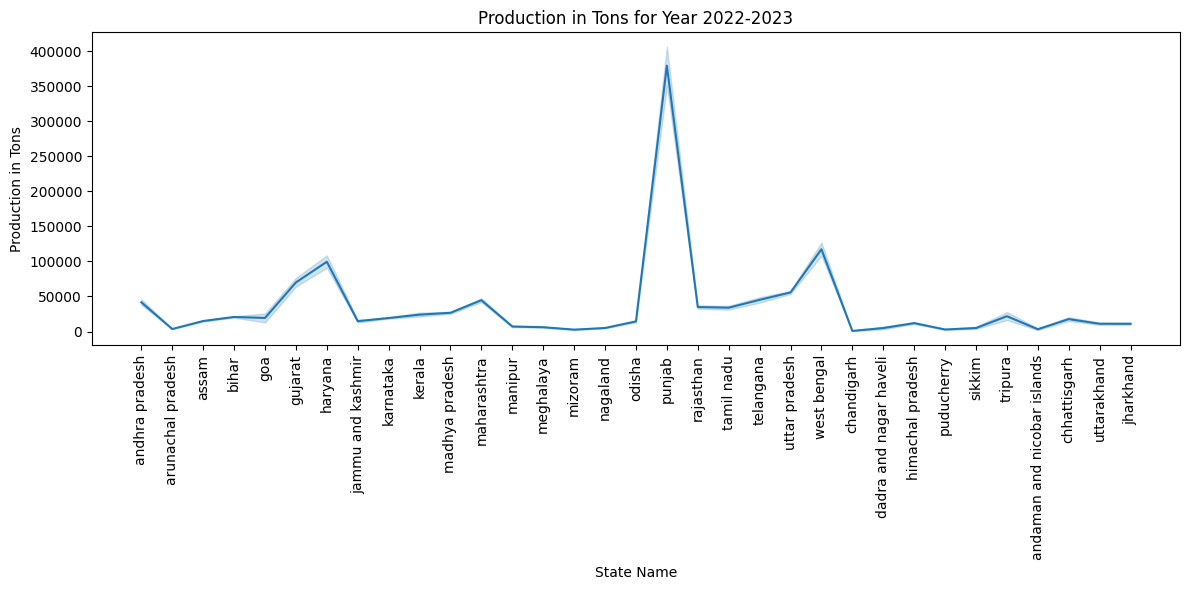

In [ ]:
# prompt: line chart for production_in_tons in the year 2022-2023

import matplotlib.pyplot as plt
df_2022_2023 = df[df['Year'] == '2022-2023']
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_2022_2023, x='State_Name', y='Production_in_tons')
plt.title('Production in Tons for Year 2022-2023')
plt.xlabel('State Name')
plt.ylabel('Production in Tons')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
l = ['N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Area_in_hectares', 'Production_in_tons', 'Yield_ton_per_hec']
for i in l:
  print(f'{i}:')
  mean = df[i].mean()
  median = df[i].median()
  mode = df[i].mode().iloc[0]
  data_range = df[i].max() - df[i].min()
  std = df[i].std()
  var = df[i].var()
  print(f'Mean: {mean}')
  print(f'Median: {median}')
  print(f'Mode: {mode}')
  print(f'Range: {data_range}')
  print(f'Standard Deviation: {std}')
  print(f'Variance: {var}')
  print('')

N:
Mean: 69.81682340333904
Median: 75.0
Mode: 80
Range: 170
Standard Deviation: 39.571469100527054
Variance: 1565.9011667739671

P:
Mean: 41.59365642119601
Median: 40.0
Mode: 40
Range: 115
Standard Deviation: 15.056507756682123
Variance: 226.69842582702896

K:
Mean: 42.037827118949615
Median: 30.0
Mode: 20
Range: 190
Standard Deviation: 28.430263218391968
Variance: 808.2798666670511

pH:
Mean: 5.643624272651705
Median: 5.54
Mode: 5.36
Range: 3.18
Standard Deviation: 0.5052825728335681
Variance: 0.2553104784093101

rainfall:
Mean: 701.1510848590373
Median: 579.75
Mode: 579.75
Range: 3318.7854309999993
Standard Deviation: 604.7015524947009
Variance: 365663.96758950147

temperature:
Mean: 26.68415401013106
Median: 27.33333333333333
Mode: 34.01
Range: 34.166666666666664
Standard Deviation: 4.851213832842028
Variance: 23.534275651957838

Area_in_hectares:
Mean: 16476.585668058768
Median: 1010.0
Mode: 2.0
Range: 726299.42
Standard Deviation: 43604.26823141345
Variance: 1901332207.9970524

Pr

In [ ]:
# Calculate descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

                  N             P             K            pH      rainfall  \
count  99849.000000  99849.000000  99849.000000  99849.000000  99849.000000   
mean      69.816823     41.593656     42.037827      5.643624    701.151085   
std       39.571469     15.056508     28.430263      0.505283    604.701552   
min       10.000000     10.000000     10.000000      3.820000      3.274569   
25%       50.000000     40.000000     20.000000      5.360000    157.310000   
50%       75.000000     40.000000     30.000000      5.540000    579.750000   
75%       80.000000     60.000000     50.000000      5.960000   1110.780000   
max      180.000000    125.000000    200.000000      7.000000   3322.060000   

        temperature  Area_in_hectares  Production_in_tons  Yield_ton_per_hec  
count  99849.000000      99849.000000        9.984900e+04       99849.000000  
mean      26.684154      16476.585668        3.776291e+04           3.931149  
std        4.851214      43604.268231        1.2224

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X = df[['N', 'P', 'K', 'pH', 'rainfall', 'temperature']]
y = df[['Area_in_hectares', 'Production_in_tons', 'Yield_ton_per_hec']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
coefficients = model.coef_
intercept = model.intercept_
print('Coefficients (Slopes):', coefficients)
print('Intercept:', intercept)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
r2 = metrics.r2_score(y_test, predictions)
print('R-squared (R2) score:', r2)

Coefficients (Slopes): [[ 1.10745130e+02 -1.37173647e+02 -1.76508142e+02  3.44328434e+03
  -6.96330731e+00 -1.47109614e+02]
 [ 4.89992856e+02 -1.93082987e+02 -1.85680842e+02  2.17641792e+04
  -1.90035185e+01 -4.64070254e+02]
 [ 4.86046460e-02  1.34500181e-01  6.17959609e-02  3.22767833e+00
  -2.71362901e-04  8.35348290e-02]]
Intercept: [ 1.12177907e+04 -7.79309713e+04 -2.79185412e+01]
Mean Squared Error: 5538386307.479366
R-squared (R2) score: 0.040117097375068266


In [ ]:
def X_reshape(X, n):
  # Code to reshape X into an array with n rows and -1 columns
  return X_reshape

X_reshape = X_reshape(X, 100)

def y_reshape(y, n):
  return y_reshape
  y_reshape = y_reshape(y, 100)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


# Get unique states in the dataset
states = df['State_Name'].unique()

# Perform linear regression for each state
for state in states:
    state_df = df[df['State_Name'] == state]

    # Define the features (independent variables) and target (dependent variable)
    X = state_df[['N','P','K','pH','rainfall','temperature']]
    y = state_df[['Area_in_hectares','Production_in_tons','Yield_ton_per_hec']]

    # Encode categorical variables to numeric
    label_encoder = LabelEncoder()
    X = X.apply(label_encoder.fit_transform)
    y = y.apply(label_encoder.fit_transform)

    # Initialize the linear regression model
    model = LinearRegression()

    # Fit the model
    model.fit(X, y)

    # Get the coefficients (slopes) and intercept
    coefficients = model.coef_
    intercept = model.intercept_

    print(f'For {state}:')
    print('Coefficients (Slopes):', coefficients)
    print('Intercept:', intercept)
    print('--------------------------------------')

For andhra pradesh:
Coefficients (Slopes): [[  37.23864396  -15.01869624  -86.57269802   -4.68723886  -19.63996739
    52.32105931]
 [ 103.08777537   43.87378286  -87.35208691   -6.98414573  152.04637431
   -77.86063768]
 [ 143.54555514   82.18307244   24.7327468   -11.97241945  286.81612899
  -238.82938365]]
Intercept: [1205.68595523  748.64503677  926.88531163]
--------------------------------------
For arunachal pradesh:
Coefficients (Slopes): [[  41.11217801    4.51750499   62.2850727    -2.69568223 -252.7421875
   202.94203451]
 [  70.7032197    16.871495     56.95789829   -2.57979293 -186.59255557
   186.79321087]
 [  15.54972378    9.99548402  -46.50564397    1.7659014   320.23832688
  -189.52209553]]
Intercept: [ 23.71180899 -73.67507048 226.71497285]
--------------------------------------
For assam:
Coefficients (Slopes): [[  80.07768428   73.07843277  125.49796529   -4.24956216 -634.47944028
   199.39534966]
 [ 156.66705634  163.53773376   95.41264012   -0.87974849 -546.13015

y = 2.3667258239215196x + 2.8009073153636113


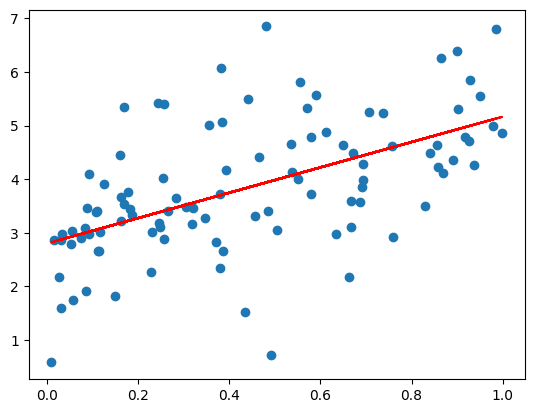

In [ ]:
# prompt: code for linear regression with equation y=ax+b

import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
X = np.random.rand(100)
y = 2 * X + 3 + np.random.randn(100)

# Fit a linear regression model
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)

# Calculate the equation of the regression line
a = model.coef_[0]
b = model.intercept_

# Print the equation
print(f'y = {a}x + {b}')

# Plot the data and the regression line
plt.scatter(X, y)
plt.plot(X, a * X + b, color='red')
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the ANOVA model
model = ols('N ~ Crop', data=df).fit()

# Perform ANOVA on the model
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq       df             F  PR(>F)
Crop      1.563521e+08     52.0  3.764893e+31     0.0
Residual  7.970047e-21  99796.0           NaN     NaN


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the ANOVA model
model = ols('P ~ Crop', data=df).fit()

# Perform ANOVA on the model
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq       df             F  PR(>F)
Crop      2.263538e+07     52.0  8.619401e+30     0.0
Residual  5.039884e-21  99796.0           NaN     NaN


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the ANOVA model
model = ols('K ~ Crop', data=df).fit()

# Perform ANOVA on the model
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq       df             F  PR(>F)
Crop      8.070513e+07     52.0  3.158292e+31     0.0
Residual  4.904093e-21  99796.0           NaN     NaN


In [ ]:
from scipy.stats import mannwhitneyu
import pandas as pd

# Separate data for high and low rainfall groups (assuming 'Rainfall_mm' is the column containing rainfall data)
high_rainfall = df[df['rainfall'] > df['rainfall'].median()]['Yield_ton_per_hec']
low_rainfall = df[df['rainfall'] <= df['rainfall'].median()]['Yield_ton_per_hec']

# Perform the Mann-Whitney U Test
statistic, p_value = mannwhitneyu(high_rainfall, low_rainfall, alternative='two-sided')

# Print the test results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is no significant impact of rainfall on crop yield.")
else:
    print("Fail to reject the null hypothesis. There is a significant impact of rainfall on crop yield.")

Mann-Whitney U statistic: 1348190900.5
P-value: 3.346537600850789e-111
Reject the null hypothesis. There is no significant impact of rainfall on crop yield.


In [ ]:
# prompt: Mann-Whitney U Test or Wilcoxon Rank Sum Test: code for testing hypothesis of impact of temperature  on crop yield

# Separate data for high and low temperature groups (assuming 'Temperature_C' is the column containing temperature data)
high_temperature = df[df['temperature'] > df['temperature'].median()]['Yield_ton_per_hec']
low_temperature = df[df['temperature'] <= df['temperature'].median()]['Yield_ton_per_hec']

# Perform the Mann-Whitney U Test
statistic, p_value = mannwhitneyu(high_temperature, low_temperature, alternative='two-sided')

# Print the test results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is no significant impact of temperature on crop yield.")
else:
    print("Fail to reject the null hypothesis. There is a significant impact of temperature on crop yield.")


Mann-Whitney U statistic: 1176538618.5
P-value: 2.9568168701242604e-52
Reject the null hypothesis. There is no significant impact of temperature on crop yield.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import kruskal

# Group the data by region
State = df['State_Name']
Production = df['Production_in_tons']
# Perform the Kruskal-Wallis H Test
stat, p = kruskal('State','Production_in_tons')

# Print the test statistic and the p-value
print("Kruskal-Wallis H statistic:", stat)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # significance level
if p < alpha:
    print("Accept null Hypothesis. There is no significant difference in crop production among regions.")
else:
    print("Fail to accept the null hypothesis. There is a significant difference in crop production among regions.")

Kruskal-Wallis H statistic: 1.0
P-value: 0.31731050786291115
Fail to accept the null hypothesis. There is a significant difference in crop production among regions.


In [ ]:
# prompt: code for finding overall crop production rate in different states

# Calculate total crop production for each state
state_production = df.groupby('State_Name')['Production_in_tons'].sum()

# Calculate total area under cultivation for each state
state_area = df.groupby('State_Name')['Area_in_hectares'].sum()

# Calculate crop production rate per state
state_production_rate = state_production / state_area

# Print the results
print(state_production_rate)


State_Name
andaman and nicobar islands    2.817919
andhra pradesh                 2.805868
arunachal pradesh              1.371537
assam                          1.892328
bihar                          1.968733
chandigarh                     5.157226
chhattisgarh                   1.216073
dadra and nagar haveli         1.928834
goa                            1.733729
gujarat                        2.706182
haryana                        3.281891
himachal pradesh               1.788475
jammu and kashmir              1.505794
jharkhand                      1.140547
karnataka                      1.684920
kerala                         4.470528
madhya pradesh                 1.307331
maharashtra                    1.123660
manipur                        2.700150
meghalaya                      2.853522
mizoram                        1.570372
nagaland                       1.708289
odisha                         1.358650
puducherry                     3.048265
punjab                       

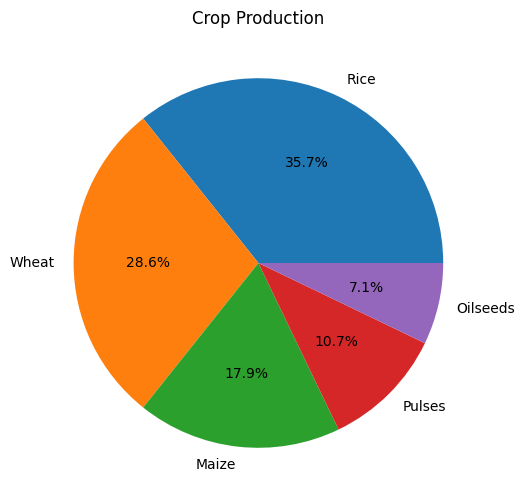

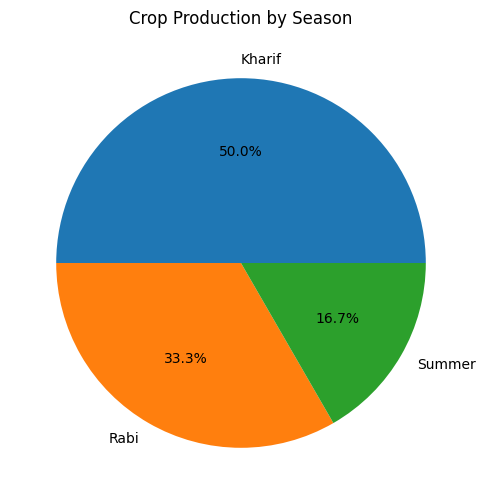

In [ ]:
# prompt: pie chart for crop production ans seasons

import pandas as pd
import matplotlib.pyplot as plt

# Create some example data
crop_production = {
    'Crop': ['Rice', 'Wheat', 'Maize', 'Pulses', 'Oilseeds'],
    'Production (in tons)': [10000, 8000, 5000, 3000, 2000],
}
seasons = {
    'Season': ['Kharif', 'Rabi', 'Summer'],
    'Production (in tons)': [6000, 4000, 2000],
}

# Create a pie chart for crop production
crop_df = pd.DataFrame(crop_production)
plt.figure(figsize=(10, 6))
plt.pie(crop_df['Production (in tons)'], labels=crop_df['Crop'], autopct='%1.1f%%')
plt.title('Crop Production')
plt.show()

# Create a pie chart for seasons
seasons_df = pd.DataFrame(seasons)
plt.figure(figsize=(10, 6))
plt.pie(seasons_df['Production (in tons)'], labels=seasons_df['Season'], autopct='%1.1f%%')
plt.title('Crop Production by Season')
plt.show()


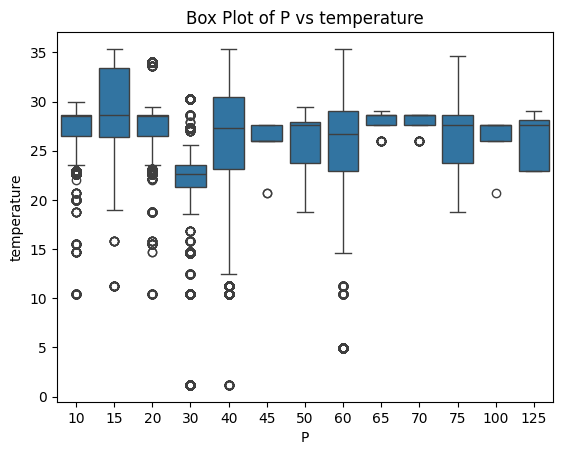

In [ ]:
# prompt: box chart for P and temperature

import matplotlib.pyplot as plt
sns.boxplot(x = 'P', y = 'temperature', data = df)
plt.title('Box Plot of P vs temperature')
plt.xlabel('P')
plt.ylabel('temperature')
plt.show()


In [ ]:
# prompt: add seasons column with summer winter and rainy

import numpy as np
df['Seasons'] = np.where(df['temperature'] > 25, 'Summer',
                          np.where(df['temperature'] < 10, 'Winter', 'Rainy'))


Seasons
Rainy     1.749279
Summer    1.764371
Winter    3.499860
dtype: float64


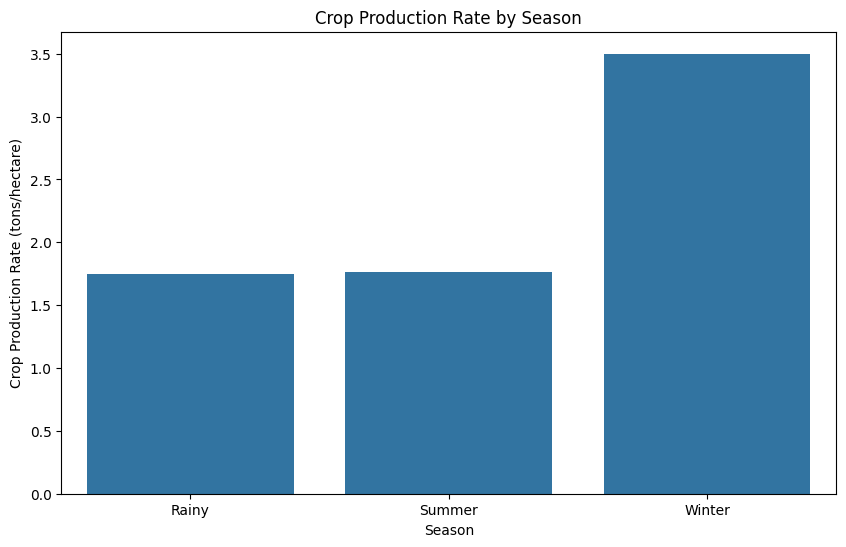

In [ ]:
# prompt: crop production rate in different seasons with plot

import matplotlib.pyplot as plt
# Calculate crop production rate for each season
season_production_rate = df.groupby('Seasons')['Production_in_tons'].sum() / df.groupby('Seasons')['Area_in_hectares'].sum()

# Print the results
print(season_production_rate)

# Create a bar chart for season-wise crop production rate
plt.figure(figsize=(10, 6))
sns.barplot(x=season_production_rate.index, y=season_production_rate.values)
plt.xlabel('Season')
plt.ylabel('Crop Production Rate (tons/hectare)')
plt.title('Crop Production Rate by Season')
plt.show()


In [ ]:
# prompt: overall crop production rate with table

import pandas as pd
# Calculate total crop production
total_production = df['Production_in_tons'].sum()

# Calculate total area under cultivation
total_area = df['Area_in_hectares'].sum()

# Calculate overall crop production rate
overall_production_rate = total_production / total_area

# Print the result
print(f"Overall Crop Production Rate: {overall_production_rate:.2f} tons/hectare")

# Create a table with state-wise crop production rate and overall rate
state_production_rate = df.groupby('State_Name')['Production_in_tons'].sum() / df.groupby('State_Name')['Area_in_hectares'].sum()

# Create a DataFrame
crop_production_rate_table = pd.DataFrame({
    'State': state_production_rate.index,
    'Production Rate (tons/hectare)': state_production_rate.values,
})

# Add overall production rate row
crop_production_rate_table.loc[len(crop_production_rate_table)] = ['Overall', overall_production_rate]

# Display the table
print(crop_production_rate_table.to_string())


Overall Crop Production Rate: 2.29 tons/hectare
                          State  Production Rate (tons/hectare)
0   andaman and nicobar islands                        2.817919
1                andhra pradesh                        2.805868
2             arunachal pradesh                        1.371537
3                         assam                        1.892328
4                         bihar                        1.968733
5                    chandigarh                        5.157226
6                  chhattisgarh                        1.216073
7        dadra and nagar haveli                        1.928834
8                           goa                        1.733729
9                       gujarat                        2.706182
10                      haryana                        3.281891
11             himachal pradesh                        1.788475
12            jammu and kashmir                        1.505794
13                    jharkhand                        1